# Exploring the Memegenerator Metadata

This notebook demonstrates some of the basic things that can be done with the set of data from memegenerator. 
[Meme Generator](https://memegenerator.net/) is a site that has been archived by the Library of Congress in its Web Cultures archive. The data explored here is available from the LC Labs experiments page located here: https://labs.loc.gov/experiments/webarchive-datasets/. 

This notebook has a few sections:

1. Initial exploration & verification of the data set
2. Count and display information about the memes represented in the data set 
3. Count & visualize the types of memes in the data set 
4. Retrieve and display a specific meme 

## 1. Initial exploration & verification of the data set

This example assumes that you have downloaded the zip file, unzipped and located the `memegenerator.csv` file, and saved that file in the same folder as this notebook. 
The file is available from [this page](https://labs.loc.gov/experiments/webarchive-datasets/). To find the csv, click "Meme Generator Data Set Download External," unzip the file, and move the unzipped files into the same folder as this notebook. The blocks of code below demonstrate a few basic steps that allow you to open up the csv file and count the rows.

First, let's open up the csv and take a closer look at it. Before we open the file, we will need to import a few basic modules. We will use the csv module to work with the downloaded data set, the string module provides a few useful string manipulation tools, and pandas supports visualizing the information.   

In [1]:
import string
import csv
import pandas as pd
import matplotlib.pyplot as plt

If we open the csv file using python's csv module, we can read the data into a dictionary, then isolate individual elements according to the associated column heading. Let's find out what the column names are: 

In [2]:
## use the contextual with open() method to open the file and read it
## note that the file is a 'utf-16' encoding
## to reuse this example you may need to change the filepath
with open('memegenerator.csv', 'r', encoding='utf-16') as memedata:
    reader = csv.DictReader(memedata)
    print('Output fieldnames:',reader.fieldnames)
    for heading in reader.fieldnames:
        print('Headers output:',heading)

Output fieldnames: ['Meme ID\tArchived URL\tBase Meme Name\tMeme Page URL\tMD5 Hash\tFile Size (In Bytes)\tAlternate Text']
Headers output: Meme ID	Archived URL	Base Meme Name	Meme Page URL	MD5 Hash	File Size (In Bytes)	Alternate Text


Before proceeding, take a careful look at the above output. In `Output fieldnames:`, notice that the printed output appears to be a list (enclosed in square brackets `[]`) with a single string inside of it. That is not what we would expect. Instead, we want a list of the column headers. If you compare that with the `Headers output:`), you'll see that the fieldnames string prints values separated by `	` and the headers lists has multiple spaces. It turns out that the data fields in this file are separated by `Tab`, not comma. That's okay, but we need to specify the delimiter is a tab, rather than the default comma. 

It is necessary to specify the encoding, which is `utf-16`. This allows for correct representation of the text  in the file, which contains text in various languages other than English and requires additional character sets. 

With this knowledge, it's possible to print a clean list of the headers. Adding up the counter variable `column` will allow us to number the column headings.

In [3]:
column = 0
with open('memegenerator.csv', 'r', encoding='utf-16') as memedata:
    reader = csv.DictReader(memedata, delimiter='\t')
    for header in reader.fieldnames:
        column = column + 1
        print('Header '+str(column)+': '+header)

Header 1: Meme ID
Header 2: Archived URL
Header 3: Base Meme Name
Header 4: Meme Page URL
Header 5: MD5 Hash
Header 6: File Size (In Bytes)
Header 7: Alternate Text


So with seven headers, we can expect to find up to seven data values for each row. We know the file is encoded in `utf-16`, and we know that the field delimiters are Tabs. 

Finally, to make the data easier to use, let's create a data object that can be referred back to and easily referenced without using the `with open()` command each time. If you're doing this a lot, it would be a good idea to create a function to do this, but for the purposes of the this exploratory notebook, we will just read the contents of the csv into a list called `memeData`.

Tip: python variables are case sensitive. So in the block below, `memeData` and `memedata` are separate variables.

In [4]:
memeData = []

with open('memegenerator.csv', 'r', encoding='utf-16') as memedata:
    reader = csv.DictReader(memedata, delimiter='\t')
    for row in reader:
        memeData.append(row)

print('Total records in the memeData list:',len(memeData))

Total records in the memeData list: 57652


The information about the set at [loc.gov](https://labs.loc.gov/experiments/webarchive-datasets/) indicates that the memegenerator set includes 57,652 records. That number matches the tally above, which gives a basic indicator that the data corresponds and the program is looping through it accurately. We've verified that we can successfully open and read through the file!

## 2. Count and display information about the memes represented in the data set

Now that we know more about the data format, including the column headers, we can loop through the rows to count them. We can also pull out the "Meme ID" value for each meme represented in the set, which gives a quick way to refer to individual records in the data set. 

To set this up, try just counting the first few rows first (below, we have stopped the loop with a break statement, which kicks us out of the loop if the counter value is greater than 2). This sample uses the counter variable `memeCount` to count the rows as the code loops through, and to print out the `Meme ID` and `Base Meme Name` field contents. For testing, this example limits our activity with a break loop, which escapes from the routine when the count exceeds 2.

In [5]:
memeCount = 0
## instead of using the contextual with open() command as above, now just use memeData
for record in memeData: 
    memeCount = memeCount + 1
    if memeCount > 2:
        break
    print(memeCount, record['Meme ID'], record['Base Meme Name'], record['Meme Page URL'])

1 10509464 Spiderman Approves http://memegenerator.net/instance/10509464
2 12285257 Alright Then Business Kid http://memegenerator.net/instance/12285257


You can try many different ways to experiment with filtering or controlling the data using other `if` statements. For example, could you count only the "Advice Yoda Gives" memes?

```
Hint:
    if record['Base Meme Name'] == 'Advice Yoda Gives'
```

## 3. Count & visualize the types of memes in the dataset

The `Base Meme Name` appears to offer a typology of the memes and refers to the "source" image that was used to create the meme. How many base meme images are in the set? And how many examples of each are there? We could use a spreadsheet program to answer these questions, but we can also do just a bit more data exploration to see how we can answer those questions using python. 

The next block uses `memeCount` again for testing. Below, the loop stops after the count exceeds 15, which gives enough sample output to analyze. 

In [6]:
## set up the counter again, and create a dictionary for the types
memeCount = 0
types = list()
counts = dict()

print('Here\'s the types and IDs from each row scanned:')
for record in memeData: 
    if memeCount > 4:
        break
    memeCount = memeCount + 1
    memeID = record['Meme ID']
    kind = record['Base Meme Name']
    #uncomment the next row if you want to see the output as the loop goes through each row
    print(memeCount,kind,memeID)

    ## Using the counts dictionary, above, see if the type is already in the dictionary, 
    ## if not noted, add it, if it is noted, increase the count...
    if kind not in counts:
        counts[kind] = 1
    else:
        counts[kind] = counts[kind] + 1

    ## Now add kind to the list of types
    if kind in types:
        continue
    else:
        types.append(kind)

#sort the list
types.sort()
print('\nLIST OF TYPES')
print('List of types:',types)
print('Found',len(types),'types in',memeCount,'rows.\n')
print('DICTIONARY OF TYPES BY COUNT')
print(counts)
for x in counts:
    print(x, counts[x])

Here's the types and IDs from each row scanned:
1 Spiderman Approves 10509464
2 Alright Then Business Kid 12285257
3 Archer 20612245
4 Futurama Fry 20614628
5 One Does Not Simply 24194267

LIST OF TYPES
List of types: ['Alright Then Business Kid', 'Archer', 'Futurama Fry', 'One Does Not Simply', 'Spiderman Approves']
Found 5 types in 5 rows.

DICTIONARY OF TYPES BY COUNT
{'Spiderman Approves': 1, 'Alright Then Business Kid': 1, 'Archer': 1, 'Futurama Fry': 1, 'One Does Not Simply': 1}
Spiderman Approves 1
Alright Then Business Kid 1
Archer 1
Futurama Fry 1
One Does Not Simply 1


The `types` list won't be necessary when the dictionary includes the whole set, so the code below uses a single dictionary (`typesDict`) to count the types of base memes and tally the occurences of each type.

In [7]:
## set up the counter again, and create a dictionary for all the types in the dataset
memeCount = 0
typesDict = dict()

for record in memeData: 
    memeCount = memeCount + 1
    memeID = record['Meme ID']
    kind = record['Base Meme Name']

    ## Using the typesDict dictionary, see if the type is already in the dictionary, 
    ## if not noted, add it, if it is noted, increase the count...
    if kind not in typesDict:
        typesDict[kind] = 1
    else:
        typesDict[kind] += 1

print('Items in the dictionary:',len(typesDict))

Items in the dictionary: 1914


We have noted 1,914 separate indicators describing the base image used in the memes. This is the answer to the first question in this section. How many base meme images are in the set? **1,914**. So this set has nearly two thousand general types of memes. 

This information would be more interesting if we could chart the more frequent base meme types. To do that, let's use the pandas module to create a graph of the main types. 

There are a lot of base memes, so the dictionary called `larges` in the next block allows to split out those memes that only have 400 or more exemplars.

In [8]:
larges = dict()
for key, val in typesDict.items():
    if val >= 400:
        larges[key] = val
#print larges.value()
print('This many base memes have more than four hundred instances:',len(larges), type(larges))
print(larges)

This many base memes have more than four hundred instances: 11 <class 'dict'>
{'Futurama Fry': 660, 'Insanity Wolf': 610, 'Philosoraptor': 530, 'Foul Bachelor Frog': 469, 'Joseph Ducreux': 414, 'Success Kid': 510, 'Y U No': 766, 'Socially Awkward Penguin': 446, 'Forever Alone': 414, 'Advice Yoda Gives': 419, 'The Most Interesting Man In The World': 507}


Now that the types have been identified and counted, it is possible to visualize the results. We can use the "pandas" library to create a bar chart as an initial example. This module allows for many more complex visualizations, which are explained in more detail in the [module's documentation](https://pandas.pydata.org/pandas-docs/stable/). 

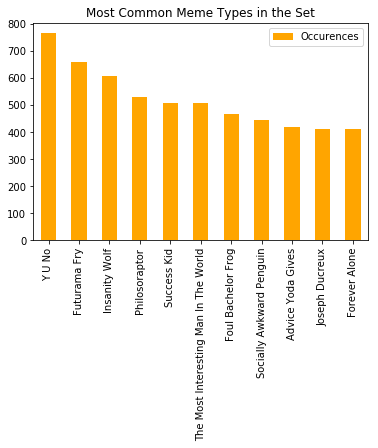

In [9]:
## Use pandas to create a bar chart and sort from largest to smallest
pd.Series(larges).sort_values()

graphable = pd.Series(larges).sort_values(ascending=False)

df = pd.DataFrame(graphable, columns=['Occurences'])

ax = df.plot.bar(color='Orange').set_title('Most Common Meme Types in the Set')

plt.show(ax)

## 4. Retrieve and display meme images

Now let's see how to actually view the meme images. Each record has an `Archived URL` field, which contains a link to a jpg file. We can check the link like this: 

In [10]:
archivedURL = ''
for row in memeData:
    if row['Meme ID'] == '10698210':
        archivedURL = row['Archived URL']
print(archivedURL)

http://webarchive.loc.gov/all/19960101000000-20160901235959*/http://cdn.meme.am/instances/250x250/10698210.jpg


Displaying the image is a bit more challenging since this URL does not directly reference the image; instead, the response to this URL is the archive's datepicker, which allows a user with a browser to choose the image based on the date when it was harvested. Our URLs do not include the specific capture date. 

We can get around this with a better understanding of the archived URL. The archived URL has four main parts:

1. the web archive domain, webarchive.loc.gov
1. the access scope, all
1. the date range, 19960101000000-20160901235959*
1. the original URL of the resource, http://cdn.meme.am/instances/250x250/10698210.jpg

The full URL [http://webarchive.loc.gov/all/19960101000000-20160901235959*/http://cdn.meme.am/instances/250x250/10698210.jpg](http://webarchive.loc.gov/all/19960101000000-20160901235959*/http://cdn.meme.am/instances/250x250/10698210.jpg) takes you to a calendar page displaying all the captures for that URL over time.

Using the understanding of the Wayback URL structure, we can either jump to the first or last capture by replacing the date range with a `0` or `2`, respectively. More about the Wayback Machine and the URL construction can be found here: [https://github.com/iipc/openwayback/wiki/OpenWayback-Replay-API](https://github.com/iipc/openwayback/wiki/OpenWayback-Replay-API).

So let's pull a particular meme out of the data set and see if we can get it to display. Using the `archivedURL` variable set above, we can replace the date range with a `0` to get the first capture.

In [11]:
archivedURL = archivedURL.replace('19960101000000-20160901235959*', '0')
print(archivedURL)

http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/10698210.jpg


And to actually display images, we'll follow the pattern laid out by the [LoC exploration demo for loc.gov](https://github.com/LibraryOfCongress/data-exploration/blob/master/loc.gov%20JSON%20API/LOC.gov%20JSON%20API.ipynb) and use `Image` from `IPython.display` library. 

In [12]:
from IPython.display import Image, display

display(Image(url=archivedURL, format='jpg'))

Have fun exploring these memes in more detail! You can read more about how Library of Congress staff analyzed this data set in this post on The Signal blog: http://blogs.loc.gov/thesignal/2018/10/data-mining-memes-in-the-digital-culture-web-archive/. 

**Contributors include:**
Jesse Johnston, Chase Dooley, Aly DesRochers